In [1]:
import sys
import argparse
import itertools

import numpy as np
from scipy.stats import norm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from brokenaxes import brokenaxes

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs


In [2]:
datapath2 = "data/data_ab.npy"
datapath3 = "data/data_c1.npy"
datapath4 = "data/data_c2.npy"

Load data

In [3]:
state, overlaps = np.load(datapath2, allow_pickle=True)

def active_idxs(state, threshold=0.15, t=0):
    return np.any(state.T[:,t:] > threshold, axis=1).nonzero()[0]
def sort_func(x):
    return np.argmax(x[10:])

state_start = state[0][0]
state_end = state[0][-1]

start_active_idxs = active_idxs(state_start)
start_sorted_idxs = start_active_idxs[np.argsort([sort_func(x) for x in state_start.T[start_active_idxs]])]

end_active_idxs = active_idxs(state_end)
end_sorted_idxs = end_active_idxs[np.argsort([sort_func(x) for x in state_end.T[end_active_idxs]])]

# Panel d
n_days = 30
corr = np.load(datapath3, allow_pickle=True)
corr_reverse = np.load(datapath4, allow_pickle=True)

Plot

In [13]:
tick_fontsize = 8
label_fontsize = 8

In [ ]:
# FIXME: Bug in matplotlib?
annotation_xoffset1 = -0.17
annotation_xoffset2 = -0.08

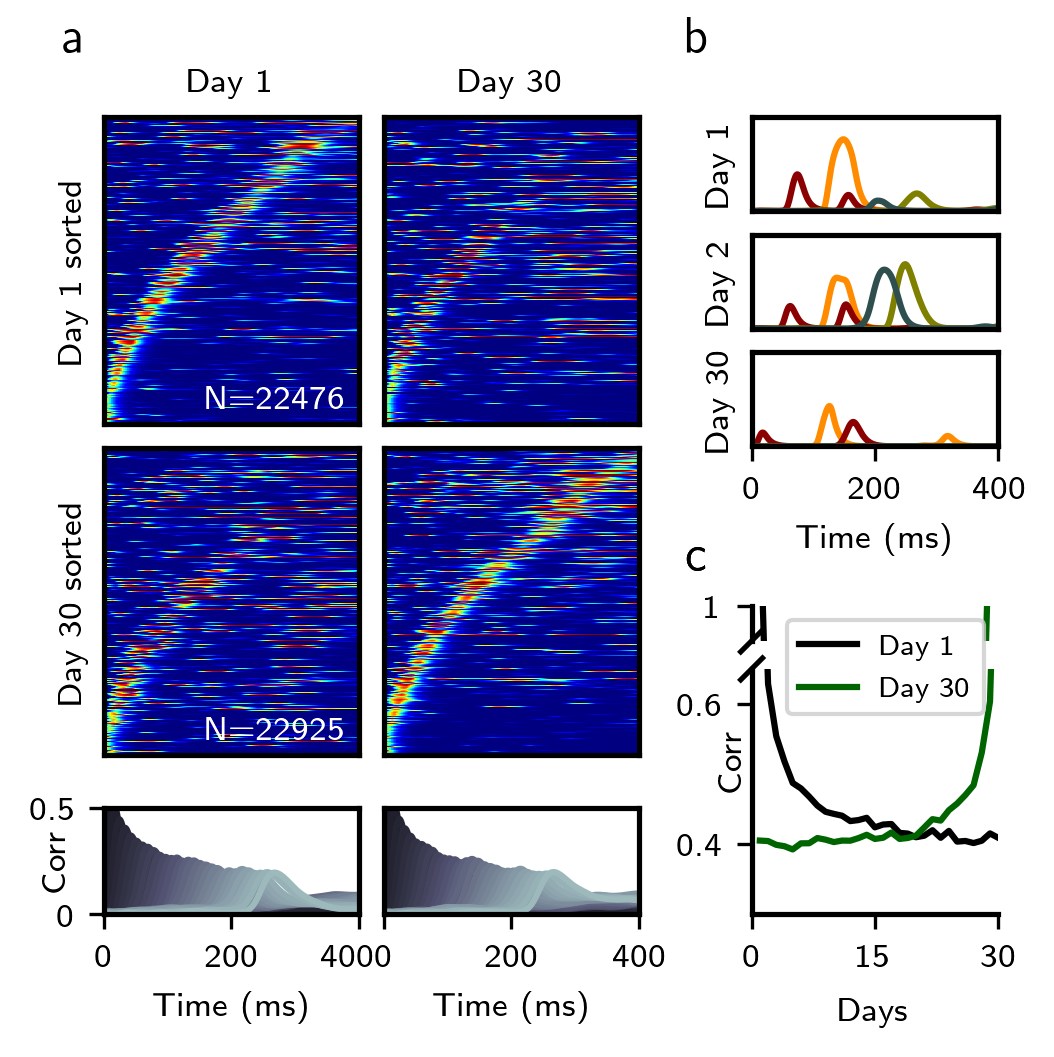

In [37]:
pu.figure_setup()
fig_size2 = pu.get_fig_size(8.7, 9)
fig2 = plt.figure(figsize=fig_size2)

# Panel a (raster of activity and pattern correlation across days)
gs2 = gridspec.GridSpec(2, 2, figure=fig2)
gs2.update(left=0.10, top=0.9, right=0.62, bottom=0.30, wspace=0.10, hspace=0.08)
ax7 = plt.subplot(gs2[0, 0])
ax8 = plt.subplot(gs2[0, 1])
ax9 = plt.subplot(gs2[1, 0])
ax10 = plt.subplot(gs2[1, 1])

gs3 = gridspec.GridSpec(1, 2, figure=fig2)
gs3.update(left=0.10, top=0.25, right=0.62, bottom=0.15, wspace=0.10, hspace=0.05)
ax11 = plt.subplot(gs3[:, 0])
ax12 = plt.subplot(gs3[:, 1])

# Panel b (snapshot of single unit activity across days)
gs4 = gridspec.GridSpec(3, 1, figure=fig2)
gs4.update(left=0.73, right=0.97, top=0.90, bottom=0.59, wspace=0.0, hspace=0.25)
ax13 = plt.subplot(gs4[0, :])
ax14 = plt.subplot(gs4[1, :])
ax15 = plt.subplot(gs4[2, :])

# Panel c
gs5 = gridspec.GridSpec(1, 1, figure=fig2)
gs5.update(left=0.73, right=0.97, top=0.44, bottom=0.15, wspace=0.0, hspace=0)
ax16 = brokenaxes(ylims=((0.30, .65), (.95, 1)), subplot_spec=gs5[0])

ax10.annotate("a", xy=(0.23+annotation_xoffset1,0.95), xycoords='figure fraction', fontsize=12)
ax13.annotate("b", xy=(0.73+annotation_xoffset2,0.95), xycoords='figure fraction', fontsize=12)
ax16.annotate("c", xy=(0.73+annotation_xoffset2,0.46), xycoords='figure fraction', fontsize=12)

# Panel a
ax7.pcolormesh(state_start.T[start_sorted_idxs,:][::20], vmin=0.0, vmax=1.0, cmap='jet', rasterized=True)
ax8.pcolormesh(state_end.T[start_sorted_idxs,:][::20], vmin=0.0, vmax=1.0, cmap='jet', rasterized=True)
ax9.pcolormesh(state_start.T[end_sorted_idxs,:][::20], vmin=0.0, vmax=1.0, cmap='jet', rasterized=True)
ax10.pcolormesh(state_end.T[end_sorted_idxs,:][::20], vmin=0.0, vmax=1.0, cmap='jet', rasterized=True)

for ax in [ax7,ax8]:
    ax.set_xticks([])
    ax.set_yticks([])
for ax in [ax9,ax10]:
    ax.set_xticks([])
    ax.set_yticks([])

ax7.set_title("Day 1", fontsize=label_fontsize)
ax8.set_title("Day 30", fontsize=label_fontsize)

ax7.set_ylabel("Day 1 sorted", fontsize=label_fontsize)
ax9.set_ylabel("Day 30 sorted", fontsize=label_fontsize)

for ax in [ax7,ax8,ax9,ax10]:
    ax.set_xlim([0,400])

for overlap, color in zip(overlaps[0][0], cs.overlap_colors(len(overlaps[0][0]))):
    ax11.plot(overlap, color=color)
for overlap, color in zip(overlaps[0][1], cs.overlap_colors(len(overlaps[0][1]))):
    ax12.plot(overlap, color=color)
ax11.set_ylim([0,0.5])
ax12.set_ylim([0,0.5])
ax11.set_xlabel("Time (ms)", fontsize=label_fontsize)
ax11.set_ylabel("Corr", fontsize=label_fontsize, labelpad=-10)
ax12.set_xlabel("Time (ms)", fontsize=label_fontsize)
ax12.set_yticks([])

ax11.set_xlim([0,400])
ax11.set_xticks([0,200,400])
ax11.set_xticklabels([0,200,400], fontsize=tick_fontsize)
ax11.set_yticks([0,0.5])
ax11.set_yticklabels([0,0.5], fontsize=tick_fontsize)
ax12.set_xlim([0,400])
ax12.set_xticks([0,200,400])
ax12.set_xticklabels([0,200,400], fontsize=tick_fontsize)

ax7.text(0.40, 0.05, "N=%i"%len(start_active_idxs), color='white', transform=ax7.transAxes, fontsize=label_fontsize)
ax9.text(0.40, 0.05, "N=%i"%len(end_active_idxs), color='white', transform=ax9.transAxes, fontsize=label_fontsize)

for ax in [ax11]:
        dx = -3/72.; dy = 0/72. 
        offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig2.dpi_scale_trans)
        for label in ax.xaxis.get_majorticklabels()[-1:]:
            label.set_transform(label.get_transform() + offset)

# Panel b
colors = ["darkorange", "darkred", "olive", "darkslategray"] 
neuron_idxs = list(range(45,45+4))
for n, ax in zip([0,1,29], [ax13, ax14, ax15]): # Days 1, 2, and 30
    for c, i in zip(colors, neuron_idxs):
        ax.plot(state[0][n][:,i], color=c)

ax13.set_ylabel("Day 1", fontsize=label_fontsize)
ax14.set_ylabel("Day 2", fontsize=label_fontsize)
ax15.set_ylabel("Day 30", fontsize=label_fontsize)
ax15.set_xlabel("Time (ms)", fontsize=label_fontsize)

for ax in [ax13,ax14,ax15]:
    ax.set_ylim([0,1])
    ax.set_xlim([0,400])

for ax in [ax13,ax14]:
    ax.set_yticks([])
    ax.set_xticks([])
ax15.set_yticks([])

ax15.set_xlim([0,400])
ax15.set_xticks([0,200,400])
ax15.set_xticklabels([0,200,400], fontsize=tick_fontsize)

# Panel c
ax16.plot(
    np.asarray(range(1,n_days+1)[:]),
    np.nanmean(corr, axis=(0,2))[:],
    color="black",
    label="Day 1")
ax16.plot(
    np.asarray(range(1,n_days+1)[:]),
    np.nanmean(corr_reverse, axis=(0,2))[:],
    color="darkgreen",
    label="Day 30")

ax16.legend(loc=1, fontsize=label_fontsize-1)
ax16.set_ylabel("Corr", labelpad=1, fontsize=label_fontsize)
ax16.set_xlabel("Days", labelpad=20, fontsize=label_fontsize)
ax16.set_xticks([0,15,30])
ax16.axs[1].set_xticks([0,15,30])
ax16.axs[1].set_xticklabels([0,15,30], fontsize=tick_fontsize)
ax16.axs[1].set_xlim([0,30])
ax16.axs[1].set_yticks([0.4,0.6])
ax16.axs[1].set_yticklabels([0.4,0.6], fontsize=tick_fontsize)
ax16.axs[0].set_yticks([1])
ax16.axs[0].set_yticklabels([1], fontsize=tick_fontsize);

plt.savefig("../output/6.pdf", dpi=300, bbox_inches='tight', pad_inches=0)